In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import datetime
import ast
import csv
from IPython.display import HTML
from urllib.parse import urljoin
import requests
import time
%matplotlib inline


import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
import html
import seaborn as sns 

[nltk_data] Downloading package stopwords to /Users/NADA/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/NADA/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/NADA/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Goal of Notebook:  
- Web scrap Indeed and Workopolis for 4 different job titles (data+scientist', 'business+analyst', 'business+intelligence+analyst','financial+analyst') and study trends in order to determine the most desirable skills. 
- Use the popular skills to help redesign MIE 1624

# Indeed


In [2]:
#job_title = []
#company = []
#location = []
#salary = []
#link = []
#summaries = []
#city = []
#cities = ['Los+Angeles','Toronto','New+York','Chicago', 'San+Francisco', 'Austin', 'Seattle', 'Philadelphia', 'Dallas', 'Pittsburgh', 'Calgary', 'Montreal', 'Houston', 'Miami']
#job_ = ['data+scientist', 'business+analyst', 'business+intelligence+analyst','financial+analyst']
#pages = list(range(0,300,10))
#for c in cities:
    #for j in job_: 
        #for page in pages:
            #result = requests.get("https://www.indeed.com/jobs?q={}&l={}&start={}".format(j,c, page)).text
            
            #ensuring at least 1 second between page grabs                    
            #time.sleep(1)
            
            #soup = BeautifulSoup(result, 'lxml') # CONVERT INTO STRUCTURED HTML. allows us to search the html file
            #divs = soup.find_all(name='div', attrs={'class':'row'})
            
            ## if results does not exist
            #if(len(divs) == 0):
                #break

            ## for job title and job link    
            #for div in divs: 
                #try:
                    #for a in div.findAll('a', attrs={"data-tn-element":"jobTitle"}):
                        #job_title.append(a["title"]) # job title
                        #link.append('https://www.indeed.com'+a["href"])
                        #city.append(c) #city
                #except:
                    #job_title.append('None')
                    #link.append("None")
            
                    
                ## for company name
    
                #try:
                    #for a in div.find_all(name="span", attrs={"class":"company"}):
                        #company.append(a.text.strip())
        
                #except:
                    #try:
                        #for b in div.find_all(name="a", attrs={"class":"turnstileLink"}):
                            #company.append(b.text.strip())
                    #except:
                        #company.append('None')
    
    
               ##for location
       
                #try:
                    #div1 = div.find('div', attrs={'class':'sjcl'})
                    #div2 = div1.find('div', attrs={'class': 'location'})
                    #location.append(div2.text.strip())
                #except:
                    #try:
                         #div3= div1.find('span', attrs={'class':'location'})
                         #location.append(div3.text.strip())
                    #except:
                         #location.append('None')

                ## for salary
    
                #try:
                    #div_two = div.find(name='span', attrs={'class':'salaryText'})
                    #salary.append(div_two.text.strip())
                #except:
                    #salary.append('None')

In [3]:
#table = dict()
#table['city'] = city
#table['job'] = job_title
#table['company' ] = company
#table['location'] = location
#table['salary'] = salary
#table['link'] = link

#Indeed_Results1 = pd.DataFrame.from_dict(table)
#Indeed_Results1.head()

In [4]:
#Indeed_Results1.shape

In [5]:
#Indeed_Results1.to_csv("Indeed_Result.csv")

In [6]:
#Indeed_Results = pd.read_csv("Indeed_Result.csv")
#Indeed_Results= Indeed_Results.iloc[:,1:]
#Indeed_Results.head()

In [7]:
#full_summary = []
#for i in range(Indeed_Results.shape[0]):
    #page = requests.get(Indeed_Results['link'].values[i])
    #soup = BeautifulSoup(page.text, "lxml")
    #try:
        #text = soup.find("div", {'class' : 'jobsearch-jobDescriptionText'}).text.strip().lower()
        #full_summary.append(text)
    #except:
        #try:
            #text = soup.find("div", {'class' : 'jobsearch-JobComponent-description'}).text.strip().lower()
            #full_summary.append(text)
        #except:
            #full_summary.append('None')

In [8]:
#save file
#with open("summaryFinalF.txt", "w") as file_output:
  #file_output.write(str(full_summary))

#read file
#with open("summaryFinalF.txt", "r") as file:
    #full_summary = eval(file.readline())

In [9]:
#from google.colab import files
#files.download('summaryFinal.txt') 

# Clean the summaries of each job posting

In [10]:
#clean_summary =[]
#for i in range(len(full_summary)):
  #text = full_summary[i].lower()
  #tw = str(text).replace('-','').replace('!','').replace('-','').replace('.','').replace("'",'')
  #tw = tw.replace('(','').replace(')','')
  #tw = tw.replace('/','').replace('\,', '')
  #tw = tw.replace('/<[^>]+>/', '')
  #tw = tw.replace('https:', '')
  #tw = tw.replace('https?://[A-Za-z0-9./]+', '')

  #clean_summary.append(tw)    

In [11]:
#clean_summary
def summary_nlp(summary):
        
    ##start by tokenize the  summary (separate it the text into words, or n-grams) with nltk
    word_tokens = word_tokenize(summary) 
    
    ##remove punctuation signs from tokens
    table = str.maketrans('', '', string.punctuation)
    word_tokens = [word.translate(table) for word in word_tokens]
    
    ##remove non-alphabetic characters
    word_tokens = [word for word in word_tokens if word.isalpha()]
    
    ##remove stopwords
    stop_words = set(stopwords.words('english')) #import a predefined set of stopwords from the nltk package
    word_tokens = [word for word in word_tokens if not word in stop_words]
    
    clean_summaries = [] #create empty list to store the final tokens after text processing
    for w in word_tokens:
        clean_summaries.append(w)

    #join the tokens of the clean summary back into a string with spaces in between
    clean_summary_str = ' '.join(clean_summaries)
    
    #return the clean summary string
    return clean_summary_str

In [12]:
#Final_summary= [] #final clean phase of the summary
#for i in range (len(clean_summary)):
  #Final_summary.append(summary_nlp(clean_summary[i]))

In [13]:
#Indeed_Results['Cleaned_summary'] = np.array(Final_summary)

In [14]:
#Indeed_Results.head()

# Look for Common Skills

In [15]:
#looking at common words in order to determine the most common skills
import itertools
import collections

#tokenize = [sentence.split() for sentence in Final_summary] # split all sentences into individual words

##flatten the tokenize list in one list 
#flat = list(itertools.chain(*tokenize))

#counts_words = collections.Counter(flat)
#counts_words.most_common(15)

In [16]:
# most common technical skills
skills = ['python', 'sql', 'excel', 'java', 'c', 'c+', 'c++', 'r', 'tableau', 'spark', 'hadoop', 'm', 'azure', 'tensorflow', 'acumen'
          'design', 'sap', 'd3','cloud', 'project management', 'audit', 'data mining', 'creating algorithms','computer skills', 'data manipulation', 'data wrangling', 
          'big data','api', 'apiengine', 'aws', 'dplyr', 'information retrieval', 'interpreting data', 'keras', 'mathematics', 'statistics', 'matlab',
          'microsoft excel', 'powerpoint', 'predictive models', 'machine learning', 'recommendation engines', 'reinforcement learning', 'risk modeling',
          'scripting languages', 'speech recognition', 'statistical learning models', 'statistical modeling', 'supervised', 'unsupervised', 
          'simulation', 'tensorflow', 'time series', 'verbal', 'bachelor', 'masters','phd', 
          'assertiveness', 'communication', 'collaboration', 'leadership', 'innovative', 'interpersonal', 'consulting', 'creativity', 'critical thinking',
          'customer service', 'decision making', 'documenting', 'facilitating meetings', 'guidance', 'logical thinking','mentoring', 'presentation', 'problem saving',
          'project timelines', 'report', 'research', 'writing', 'working independently', 'supervisory','nlp', 'logistic', 'linear', 'optimization', 
          'mathematical modelling', 'matplotlib', 'neural networks', 'nltk', 'numpy', 'pandas', 'random forests',
          'deep learning', 'seaborn', 'sklearn', 'ensemble methods', 'knn', 'naives bayes', 'svm',
          'hypothesis testing', 'decision trees', 'web scraping', 'chatbots',
          'network analysis', 'bokeh', 'cluster analysis', 'gradient boosting', 'principle component analysis', 'build pipeline',
          'feature engineering', 'simulation', 'monte carlo', 'hyperparameter tuning', 'model validation', 'ggplot', 'plotly',
          'geoplotlib', 'tableau', 'model training', 'model testing', 'relational Database', 'pyspark', 'query tuning', 'error handling',
          'recursive queries', 'postgresql', 'triggers', 'neural nets', 'tensors', 'kafka', 'pivot tables', 'conditional formating', 'multivariable calculus', 
          'nosql', 'scikit', 'scipy', 'xgboost', 'validating analytics']

## append empty zero columns for hard type skills
#for sk in skills:
  #Indeed_Results[sk] = np.zeros(len(Indeed_Results))


In [17]:
# search for a skill, if it is present in job summary then place 1. 
import re
#for i in range (len(Final_summary)):
  #text = Final_summary[i]
  #for sk in skills :
    #if any(x in sk for x in ['+']):
      #skk = re.escape(sk)
    #else:
      #skk = sk
    #result = re.search(r'(?:^|(?<=\s))' + skk + r'(?=\s|$)',text)
    #if result:
      #Indeed_Results[sk][i] = 1

# Job Count in each city based on indeed

In [18]:
# Read in indeed data only 
Indeed_Results = pd.read_csv('Indeed_Result.csv')
Indeed_Results = Indeed_Results.iloc[:,1:]
Indeed_Results.head()

,city,job,company,location,salary,link
0,Los+Angeles,Machine Learning Engineer,Triplebyte,"Los Angeles, CA","$150,000 - $250,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,Los+Angeles,Senior Data Scientist - Advanced Analytics (76...,Fortune 500 client of Nabler,"Burbank, CA","$100,000 - $160,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,Los+Angeles,Staff Data Scientist - Engineering,Lifesprk,United States,"$120,000 - $170,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,Los+Angeles,Data Scientist - HBO Max,HBO Max,"Burbank, CA",None,https://www.indeed.com/rc/clk?jk=c7ae5671ad43c...
4,Los+Angeles,Data Science Intern,Dolphin,"Los Angeles, CA 90013",$25 an hour,https://www.indeed.com/company/Dolphin/jobs/Da...


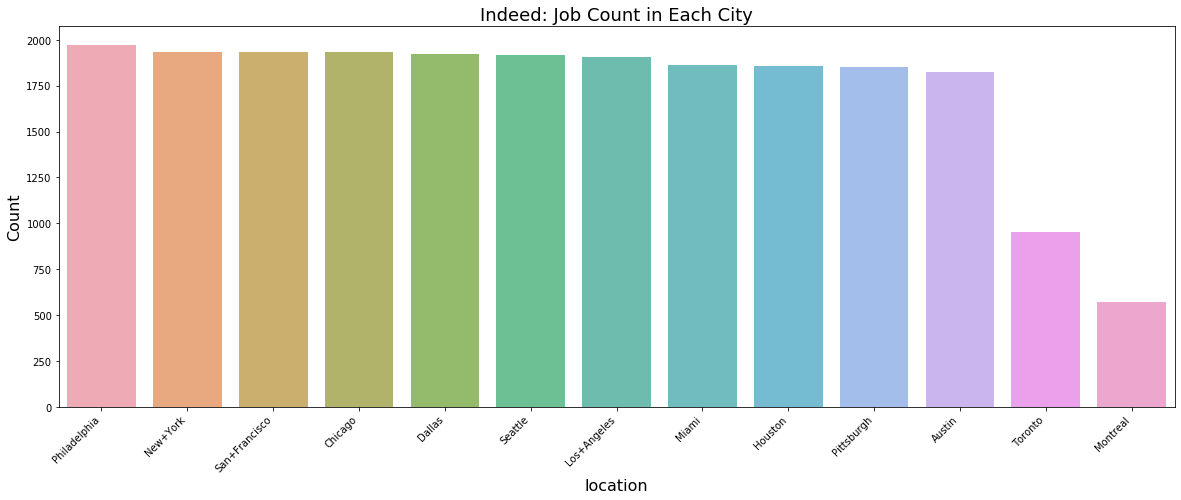

In [19]:
location = Indeed_Results['city'].value_counts() # count the number of jobs in each location
plt.figure(figsize=(20,7))

sns.barplot(location.index, location.values, alpha=0.8)
plt.title('Indeed: Job Count in Each City',fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('location', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

# Workopolis

Workopolis is a canadian website that extracts information from all cities in canada that are relevant to the search. We won't specify the city names because job positings are limited on this site. We used this site to get a deeper look on the data science field in canada. 

In [20]:
#job_title = []
#company = []
#location = []
#salary = []
#link = []
#summaries = []
#pages = list(range(0,20,1))
#for page in pages:
  
  #result = requests.get("https://www.workopolis.com/jobsearch/find-jobs?ak=data+scientist&lg=en&pn={}".format(page)).text
  #soup = BeautifulSoup(result, 'lxml')

  #for article in soup.find_all(name='article', attrs={'class':'JobCard'}): 

    # for job title
    #try:
      #for a in article.findAll('h2'):
        #job_title.append(a['title'])
    
    #except:
      #job_title.append('None')


    #for company name
    
    #try:
      #for a in article.find_all('div', attrs={"class":"JobCard-company"}):
          #company.append(a.text.strip())
    #except:
      #company.append('None')
    
    
    # for location
       
    #try:
      #div1 = article.find('span', attrs={'class':'JobCard-location'})
      #location.append(div1.text.strip())
    #except:
      #location.append('None')

    ## for salary
    
    #try:
      #div_two = article.find(name='span', attrs={'class':'Salary'})
      #salary.append(div_two.text.strip())
    #except:
      #salary.append('None')


    ##for link
    #try:
      #for a in article.findAll('a'):
        #link.append('https://www.workopolis.com' + a['href'])

    #except:
      #link.append('None')

In [21]:
#table = dict()
#table['city'] = location
#table['job'] = job_title
#table['company' ] = company
#table['location'] = location
#table['salary'] = salary
#table['link'] = link

#Workopolis_Results = pd.DataFrame.from_dict(table)
#Workopolis_Results.head()

## Clean Summary 

In [22]:
#clean_summary_work =[]
#for i in range(Workopolis_Results.shape[0]):
  #post = requests.get(Workopolis_Results['link'].values[i])
  #soup = BeautifulSoup(post.text, "lxml")
  #text = soup.find("div", {'class' : 'viewjob-description'}).text.strip().lower()

  #tw = str(text).replace('-','').replace('!','').replace('-','').replace('.','').replace("'",'')
  #tw = tw.replace('(','').replace(')','')
  #tw = tw.replace('/','').replace('\,', '')
  #tw = tw.replace('/<[^>]+>/', '')
  #tw = tw.replace('https:', '')
  #tw = tw.replace('https?://[A-Za-z0-9./]+', '')
  #tw = tw.replace (u'\xa0', u'')

  #clean_summary_work.append(tw)   

In [23]:
#Final_summary_work= [] #final clean phase of the summary for workopolis
#for i in range (len(clean_summary_work)):
  #Final_summary_work.append(summary_nlp(clean_summary_work[i]))

In [24]:
#Workopolis_Results['Cleaned_summary'] = np.array(Final_summary_work)

In [25]:
# remove \xa0 character from location
#from unicodedata import normalize
#city_name = []
#for i in range (Workopolis_Results.shape[0]):
  #city_ = Workopolis_Results['city'].values[i]
  #city_ = normalize('NFKD', city_)
  #city_ = city_.replace('— ', '')
  #city_name.append(city_)

In [26]:
#Workopolis_Results['city'] = np.array(city_name)

## Check for skills

In [27]:
## append empty zero columns for each skill
#for sk in skills:
    #Workopolis_Results[sk] = np.zeros(len(Workopolis_Results))

In [28]:
# find the skills in the workopolis summaries
#for i in range (len(Final_summary_work)):
  #text = Final_summary_work[i]
  #for sk in skills :
    #if any(x in sk for x in ['+']):
      #skk = re.escape(sk)
    #else:
      #skk = sk
    #result = re.search(r'(?:^|(?<=\s))' + skk + r'(?=\s|$)',text)
    #if result:
      #Workopolis_Results[sk][i] = 1

In [29]:
#Workopolis_Results.to_csv(r'Workopolis_Results.csv')

# Job count in each Canadian City based on Workopolis

In [30]:
#Read in Workopolis Data only
Workopolis_Results = pd.read_csv('Workopolis_Results.csv')
Workopolis_Results.head()
Workopolis_Results = Workopolis_Results.iloc[:,1:]
Workopolis_Results.head()

,city,job,company,location,salary,link,Cleaned_summary,python,sql,excel,...,tensors,kafka,pivot tables,conditional formating,multivariable calculus,nosql,scikit,scipy,xgboost,validating analytics
0,"Toronto, ON",Sr. Full Stack Engineer,TD Bank,"— Toronto, ON","Estimated: $84,000 - $120,000 a year",https://www.workopolis.com/jobsearch/viewjob/n...,tell us story dont go unnoticed explain youre ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Toronto, ON",Data Engineer,"Thales Canada Inc., Transportation Solutions","— Toronto, ON","Estimated: $91,000 - $120,000 a year",https://www.workopolis.com/jobsearch/viewjob/0...,location toronto canada l activité mondiale sy...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Toronto, ON",ZEB Simulation Team Lead,Canadian Urban Transit Research and Innovation...,"— Toronto, ON","$72,000 - $80,000 a year",https://www.workopolis.com/jobsearch/viewjob/M...,job posting deadline april toronto ontariohour...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Ottawa, ON",Data Scientist,Interset,"— Ottawa, ON","Estimated: $74,000 - $100,000 a year",https://www.workopolis.com/jobsearch/viewjob/K...,help us catch bad guys math team growing looki...,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Ottawa, ON",Junior Data Scientist,Office of the Auditor General of Canada,"— Ottawa, ON","$67,000 - $78,000 a year",https://www.workopolis.com/jobsearch/viewjob/H...,process number job title junior data scientist...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


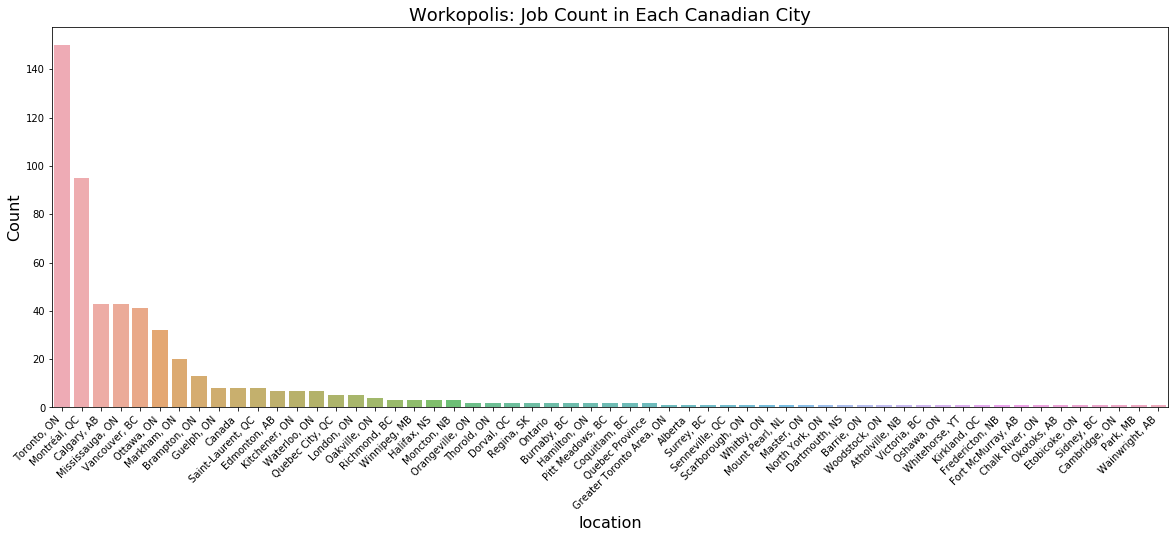

In [31]:
location = Workopolis_Results['city'].value_counts() # count the number of jobs in each location
plt.figure(figsize=(20,7))

sns.barplot(location.index, location.values, alpha=0.8)
plt.title('Workopolis: Job Count in Each Canadian City',fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('location', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

# Combine Indeed and Workopolis Results

In [32]:
#Final_Results = pd.concat([Indeed_Results,Workopolis_Results],ignore_index=True)

In [33]:
#Final_Results.to_csv("Final_Results.csv")

# Read in Final Webscraped Data

In [34]:
Final_Results = pd.read_csv('Final_Results.csv')
Final_Results = Final_Results.iloc[:,1:]
Final_Results.head()

,city,job,location,salary,link,Cleaned_summary,python,sql,excel,java,...,tensors,kafka,pivot tables,conditional formating,multivariable calculus,nosql,scikit,scipy,xgboost,validating analytics
0,Los+Angeles,Machine Learning Engineer,"Los Angeles, CA","$150,000 - $250,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,triplebytetriplebyte transforming way software...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Los+Angeles,Data Scientist,"Los Angeles, CA 90079",None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,position advance2 fastgrowing marketing optimi...,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Los+Angeles,Data Scientist Director (Northeast),United States,None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,company description clearlink partners indust...,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Los+Angeles,Data Scientist,"Los Angeles, CA 90024","$110,000 - $150,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,data scientist data scientistmachine learning ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Los+Angeles,Data Scientist,"Los Angeles, CA",None,https://www.indeed.com/rc/clk?jk=18552fae85097...,mutesix mutesix iprospect company awardwinn...,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Job Type

Determining the job type (business or engineering) the job posting is referring too. 

In [35]:
Final_Results["job_type"] = ''

In [36]:
job_ty = 'business'
for i in range (Final_Results.shape[0]):
    text = Final_Results['job'].values[i].lower()
    result = text.find(job_ty)
    if result>-1:
        Final_Results["job_type"][i] = job_ty
    else:
        Final_Results["job_type"][i] = 'engineering' # if skill is found place a one

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


As you can see most of the job types are categorized under engineering

In [37]:
Final_Results.job_type.value_counts()

engineering    22584
business        7468
Name: job_type, dtype: int64

# Extract Job Experience

In [38]:
Final_Results['Experience'] = ''
for i in range(Final_Results.shape[0]):
    
    text = Final_Results['Cleaned_summary'].values[i]
    index = text.find('years')
    experience_text = text[index-25:index]
    years_ = re.findall('([0-9]+)', experience_text)
    
    
    if len(years_)==2:
        exp_year = int(years_[1]) # take max number 
        
        #remove bad numbers
        if exp_year>15:
            Final_Results['Experience'][i] = 0
        else:
            Final_Results['Experience'][i] = exp_year
         
    
    elif len(years_)==1:
        if int(years_[0]) >15:
            Final_Results['Experience'][i] = 0
        else:
            Final_Results['Experience'][i] = int(years_[0])
            
    else:
            Final_Results['Experience'][i] = 'None'

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/NADA/opt/anaconda3/lib

# Skills based on Contract Type

In [39]:
contract = ['fulltime', 'full time','parttime', 'part time', 'temporary', 'contract']
Final_Results['Contract_Type'] = ''
for i in range(Final_Results.shape[0]):
    text = Final_Results['Cleaned_summary'].values[i]
    if text == '' or 'None':
        for c in contract :
            result =  re.search(r'(?:^|(?<=\s))' + c + r'(?=\s|$)',text)
            if result:
                Final_Results['Contract_Type'][i] = c
    else:
        break

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [40]:
Final_Results['Contract_Type'] = Final_Results['Contract_Type'].map({'':'None', 'fulltime':'full-time', 'full time':'full-time', 
                                                                    'parttime':'part-time', 'part time': 'part-time', 'temporary':'temporary',
                                                                    'contract':'contract'})

In [41]:
Final_Results['Contract_Type'].value_counts()

None         22540
full-time     4397
contract      2231
part-time      562
temporary      322
Name: Contract_Type, dtype: int64

In [42]:
#export final csv for later use
#Final_Results.to_csv(r"Final_ResultsF.csv")

In [43]:
Final_Results.head()

,city,job,location,salary,link,Cleaned_summary,python,sql,excel,java,...,conditional formating,multivariable calculus,nosql,scikit,scipy,xgboost,validating analytics,job_type,Experience,Contract_Type
0,Los+Angeles,Machine Learning Engineer,"Los Angeles, CA","$150,000 - $250,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,triplebytetriplebyte transforming way software...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,engineering,None,None
1,Los+Angeles,Data Scientist,"Los Angeles, CA 90079",None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,position advance2 fastgrowing marketing optimi...,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,engineering,3,None
2,Los+Angeles,Data Scientist Director (Northeast),United States,None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,company description clearlink partners indust...,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,engineering,3,full-time
3,Los+Angeles,Data Scientist,"Los Angeles, CA 90024","$110,000 - $150,000 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,data scientist data scientistmachine learning ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,engineering,2,full-time
4,Los+Angeles,Data Scientist,"Los Angeles, CA",None,https://www.indeed.com/rc/clk?jk=18552fae85097...,mutesix mutesix iprospect company awardwinn...,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,engineering,2,None


# Visualize Trends from data

## Experience Level for engineering and business

In [44]:
# extract work experience for engineering and business
Final = Final_Results
Exper_type=Final.groupby(['Experience', 'job_type']).Experience.agg('count').to_frame('count').reset_index()
Exper_Type1 = Exper_type[~Exper_type['Experience'].isin(['None', 0])] # drop experience years labelled as None or 0 as they are uninformative

In [45]:
Exper_Type1['Experience'] = Exper_Type1['Experience'].astype(int) # convert experience years to integers
Exper_Type1 = Exper_Type1.sort_values(by=['Experience'])  # sort experience years as ascending

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Years of Experience for Business and Experience')

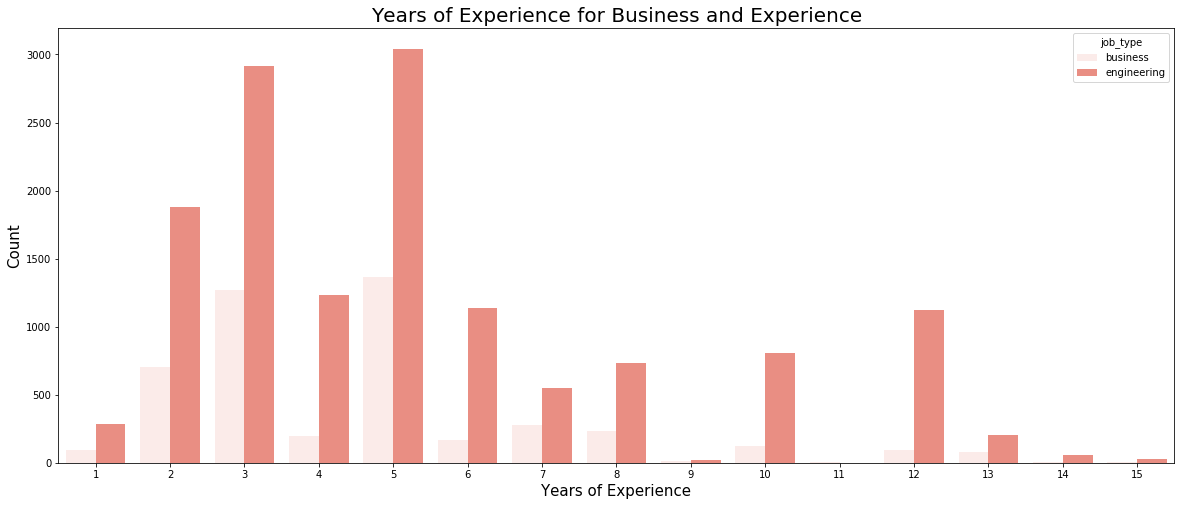

In [46]:
plt.figure(figsize=(20,8))
sns.barplot(x="Experience", y='count', hue="job_type", color = "salmon", data=Exper_Type1)
plt.xlabel("Years of Experience", size=15)
plt.ylabel("Count", size=15)
plt.title("Years of Experience for Business and Experience", size=20)

# Most Common skills based on contract type

Text(0.5, 1.0, 'Most Common Skills based on Contract Type')

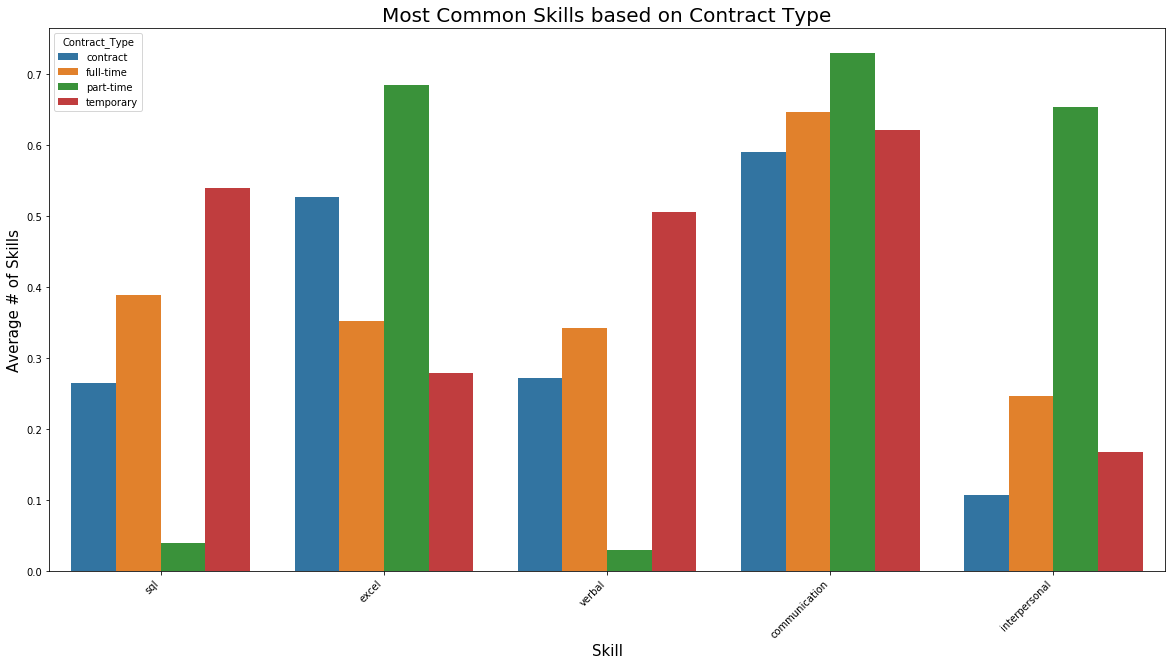

In [47]:
skill_contract = Final.groupby('Contract_Type').agg('mean')
# drop degree columns as they are not skills
skill_contract1 = skill_contract.drop(['masters', 'bachelor', 'phd'], axis=1)
skill_contract2 = skill_contract1.drop(['None'], axis=0) # drop none as that is not informative 

thres = skill_contract2[skill_contract2.columns[skill_contract2.mean() >0.27 ]].reset_index()
melt_thres = thres.melt(id_vars=['Contract_Type'])

plt.figure(figsize=(20,10))
sns.barplot(data=melt_thres, hue='Contract_Type', x='variable',y='value')
plt.xlabel("Skill", size=15)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average # of Skills", size=15)
plt.title("Most Common Skills based on Contract Type", size=20)

## Most common skills for business and engineering

In [48]:
# find the count for each skill for business and engineering
skill_count = Final.groupby('job_type').agg('mean')
# drop degree columns as they are not skills
skill_type = skill_count.drop(['masters', 'bachelor', 'phd'], axis=1)

a = skill_type[skill_type.columns[skill_type.mean() >0.2 ]].reset_index()
melt = a.melt(id_vars=['job_type'])

melt = melt.sort_values(by = ['value'], ascending=False)

Text(0.5, 1.0, 'Most Commons Skills for Business and Experience')

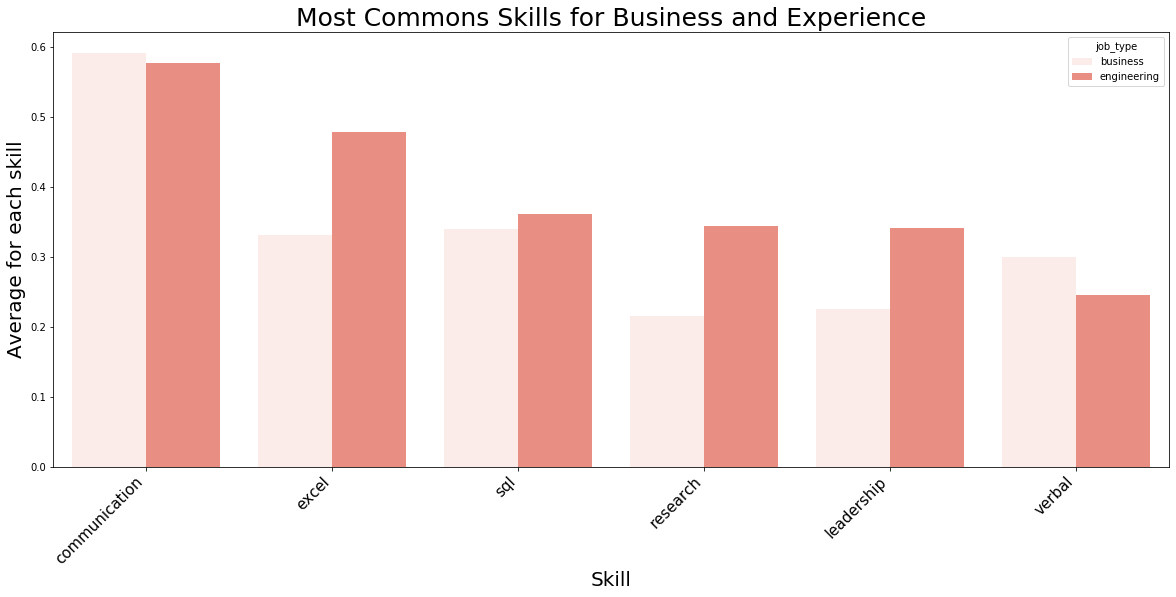

In [49]:
plt.figure(figsize=(20,8))
sns.barplot(data=melt, hue='job_type', x='variable',y='value', color='salmon')
plt.xlabel("Skill", size=20)
plt.xticks(rotation=45, ha='right', size = 15)
plt.ylabel("Average for each skill", size=20)
plt.title("Most Commons Skills for Business and Experience", size=25)

As you can see from above soft skills, excel, and sql are the most common skills for engineering and business. This emphasizes that aspiring data scientists should look to improve their communication skills just as much as their techincal skills. 

## General: Hard and Soft skills

In [50]:
#map webscraped skills to hard or soft categories
skills_type = {'python':'Hard', 'sql':'Hard', 'excel':'Hard', 'java':'Hard', 'c':'Hard', 'c+': 'Hard', 'c++': 'Hard', 'r': 'Hard', 'tableau': 'Hard', 'spark':'Hard', 'hadoop':'Hard', 'm': 'Hard', 'azure': 'Hard', 'tensorflow': 'Hard', 'acumen': 'Hard',
                'design': 'Soft', 'sap': 'Hard', 'd3': 'Hard','cloud': 'Hard', 'project management':'Soft', 'audit': 'Soft', 'data mining': 'Hard', 'creating algorithms': 'Hard','computer skills': 'Hard', 'data manipulation': 'Hard', 'data wrangling': 'Hard', 
                'big data':'Hard','api': 'Hard', 'apiengine':'Hard', 'aws': 'Hard', 'dplyr': 'Hard', 'information retrieval':'Hard', 'interpreting data':'Hard', 'keras':'Hard', 'mathematics': 'Hard', 'statistics':'Hard', 'matlab':'Hard',
                'microsoft excel':'Soft', 'powerpoint':'Soft', 'predictive models':'Hard', 'machine learning':'Hard', 'recommendation engines':'Hard', 'reinforcement learning':'Hard', 'risk modeling':'Hard',
               'scripting languages':'Hard', 'speech recognition':'Hard', 'statistical learning models':'Hard', 'statistical modeling':'Hard', 'supervised':'Hard', 'unsupervised':'Hard', 
               'simulation':'Hard', 'tensorflow':'Hard', 'time series':'Hard', 'verbal':'Soft', 'assertiveness':'Soft', 'communication':'Soft', 'collaboration':'Soft', 'leadership':'Soft', 'innovative':'Soft', 'interpersonal':'Soft', 'consulting':'Soft', 
               'creativity':'Soft', 'critical thinking':'Soft', 'customer service':'Soft', 'decision making':'Soft', 'documenting':'Soft', 'facilitating meetings':'Soft', 'guidance':'Soft', 'logical thinking':'Soft','mentoring':'Soft', 'presentation':'Soft', 'problem saving':'Soft',
               'project timelines':'Soft', 'report':'Soft', 'research':'Soft', 'writing':'Soft', 'working independently':'Soft', 'supervisory':'Soft','nlp':'Hard', 'logistic':'Hard', 'linear':'Hard', 'optimization':'Hard', 
               'mathematical modelling':'Hard', 'matplotlib':'Hard', 'neural networks':'Hard', 'nltk':'Hard', 'numpy':'Hard', 'pandas':'Hard', 'random forests':'Hard',
                'deep learning':'Hard', 'seaborn':'Hard', 'sklearn':'Hard', 'ensemble methods':'Hard', 'knn':'Hard', 'naives bayes':'Hard', 'svm':'Hard',
                'hypothesis testing':'Hard', 'decision trees':'Hard', 'web scraping':'Hard', 'chatbots':'Hard',
                'network analysis':'Hard', 'bokeh':'Hard', 'cluster analysis':'Hard', 'gradient boosting':'Hard', 'principle component analysis':'Hard', 'build pipeline':'Hard',
                'feature engineering':'Hard', 'monte carlo':'Hard', 'hyperparameter tuning':'Hard', 'model validation':'Hard', 'ggplot':'Hard', 'plotly':'Hard',
                'geoplotlib':'Hard', 'tableau':'Hard', 'model training':'Hard', 'model testing':'Hard', 'relational Database':'Hard', 'pyspark':'Hard', 'query tuning':'Hard', 'error handling':'Hard',
                'recursive queries':'Hard', 'postgresql':'Hard', 'triggers':'Hard', 'neural nets':'Hard', 'tensors':'Hard', 'kafka':'Hard', 'pivot tables':'Soft', 'conditional formating':'Soft', 'multivariable calculus':'Hard', 
                'nosql':'Hard', 'scikit':'Hard', 'scipy':'Hard', 'xgboost':'Hard', 'validating analytics':'Hard', 'acumendesign':'Hard'}

In [51]:
Final.rename(columns=skills_type, inplace=True) # map hard or soft categories to skills
Final = Final.drop(['masters', 'bachelor', 'phd'], axis=1) # drop degrees again

In [52]:
H_S = Final.iloc[:,7:-3] #extract skills only
v = H_S.sum().values # count for each skill
H_S.loc[len(H_S)] = v/30052 # total number of job postings
avgHS = H_S.iloc[[-1]]
A = pd.melt(avgHS)
A  = A.groupby('variable').sum().reset_index()

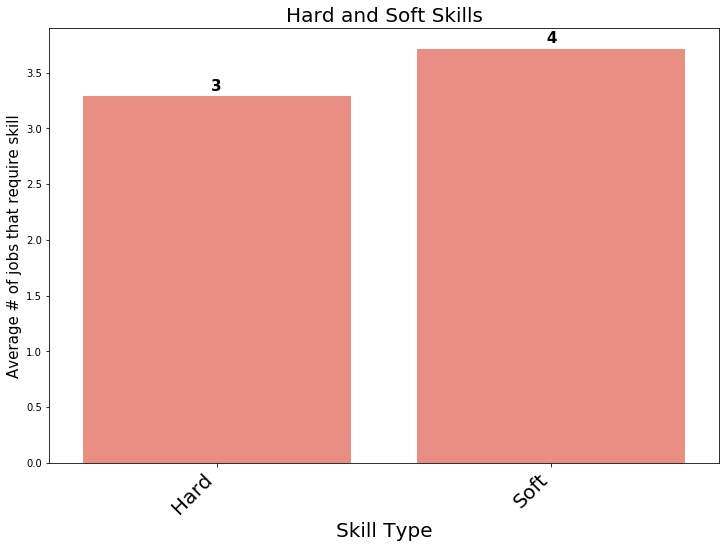

In [53]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=A, x='variable' ,y='value', color='salmon')
plt.xlabel("Skill Type", size=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.ylabel("Average # of jobs that require skill", size=15)
plt.title("Hard and Soft Skills", size=20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +0.05,
            '{:.0f}'.format(height),
            ha="center", fontsize=15, weight='bold')

In [54]:
#reset dataframe to back to original skill labels 
Final = pd.read_csv(r'Final_ResultsF.csv')
Final = Final.iloc[:, 2:]
Final = Final.drop(['masters', 'bachelor', 'phd'], axis=1) # drop degrees again
hard_soft = Final.groupby('job_type').agg('mean').reset_index()
melt_hs = hard_soft.melt(id_vars=['job_type'])
melt_hs['variable']= melt_hs['variable'].map(skills_type)
k = melt_hs.groupby(['job_type','variable']).agg('sum').reset_index()

In [55]:
hard_soft = Final.groupby('job_type').agg('mean').reset_index()
melt_hs = hard_soft.melt(id_vars=['job_type'])
melt_hs['variable']= melt_hs['variable'].map(skills_type)
k = melt_hs.groupby(['job_type','variable']).agg('sum').reset_index()

[None, None]

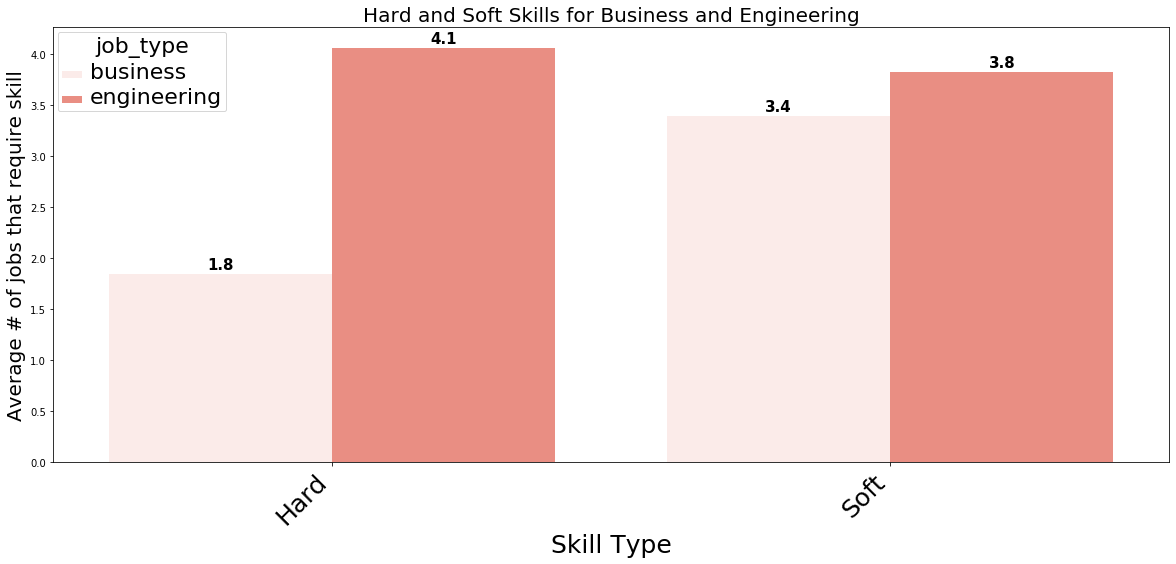

In [56]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data=k, hue='job_type', x='variable',y='value', color='salmon')
plt.xlabel("Skill Type", size=25)
plt.xticks(rotation=45, ha='right', fontsize=25)
plt.ylabel("Average # of jobs that require skill", size=20)
plt.title("Hard and Soft Skills for Business and Engineering", size=20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +0.05,
            '{:.1f}'.format(height),
            ha="center", fontsize=15, weight='bold')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title/


## Most sought after programming languages

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


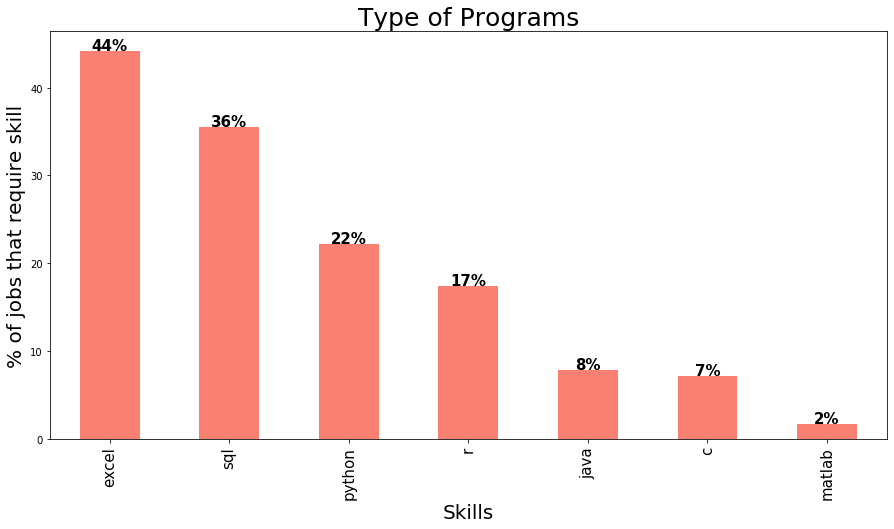

In [57]:
skills = ['python', 'sql', 'excel', 'java', 'c', 'r', 'matlab'] # these were the languages that we webscraped for, c+ and c++ were excluded as they didn't product any results

program = Final[skills]

#count the number of jobs that require each program and append to dataframe
pg = program.sum().values
program.loc[len(program)] = pg/30052 *100  # 30052 is the total amount of job postings that were webscraped

plt.figure(figsize=(15,7.5))
ax = program.iloc[-1,:].sort_values(ascending=False).plot.bar(color='salmon')
plt.xticks(rotation=90, ha='center', fontsize=15)
ax.set_xlabel('Skills', size=20)
ax.set_ylabel('% of jobs that require skill', size=20)
ax.set_title('Type of Programs', size=25)
#ax.figure.savefig('myimage.tiff', format='tiff', dpi=1200)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
             height +0.1,
            '{:.0f}'.format(height)+'%',
            ha="center", fontsize=15, weight='bold')

So it seems that most jobs value excel more than SQL and python. This is not suprising as some companies are resistant to investing in data science and would rather stick to a simple, but very versatile, program such as excel. 

# The type of degrees jobs are looking for 

In [58]:
#reset dataframe back to orginal
Final = pd.read_csv(r'Final_ResultsF.csv')
Final = Final.iloc[:, 1:]
Final_dg = Final[['masters', 'bachelor', 'phd']]
v = Final_dg.sum().values

Final_dg.loc[len(Final_dg)] = v/30052 *100 # total number of job postings
avgdg = Final_dg.iloc[[-1]]
A = pd.melt(avgdg).sort_values(by='value', ascending=False)

/Users/NADA/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


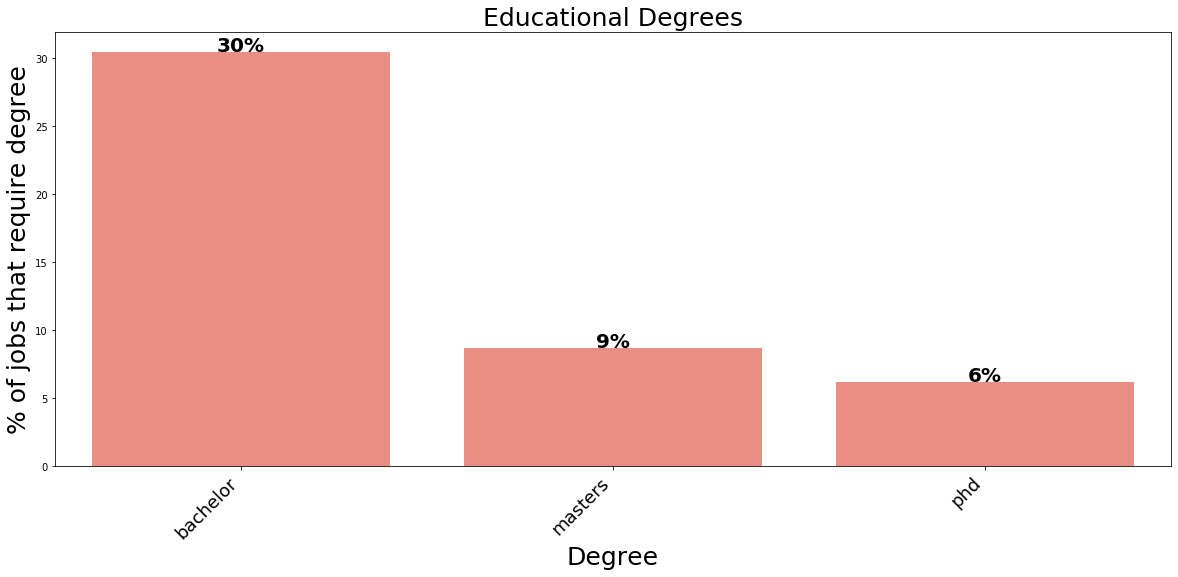

In [59]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data=A, x='variable' ,y='value', color='salmon')
plt.xlabel("Degree", size=25)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.ylabel("% of jobs that require degree", size=25)
plt.title("Educational Degrees", size=25)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +0.05,
            '{:.0f}'.format(height)+'%',
            ha="center", fontsize=20, weight='bold')

A great deal for jobs are looking for individuals with a bachelors. Which is interesting because most students who can't find jobs tend to go the masters route.

### Determine the weight of each skills by dividing by maximum count 

This will be used in the Course Cirriculum notebook

In [60]:
#reset dataframe back to orginal
Final = pd.read_csv(r'Final_ResultsF.csv')
skill_df = Final.iloc[:,7:-3]# extract skills only
v= skill_df.sum().values
A = np.array(v/max(v)) # standardize by dividing maximum count
df = pd.DataFrame()
df['skills'] = skill_df.columns
df['weights'] = np.array(A)

In [61]:
df.to_csv('skillsWebF.csv', index=False)

# Dicussion

Some of the trends we noticed from this notebook are as follows:
- Most of the data science related jobs are in the United States, a large amount are in Philidelphia and San Franciso. 
- Most of the data science related jobs in Canada are in Toronto and Montreal
- Employers are mainly looking for individuals with on average 5 years of experience
- Communication and excel are the most popular skills regardless of contract type and job type (business or engineering)
- Soft skills are equal as important in engineering as they are in business
- Hards skills are much more important for engineering than business
- The most important programs to have knowledge of is excel, sql, python. 
- Most jobs are looking for potential employees with a bachelors degree

In the Course Cirriculum Notebook we take a deeper looking into skills and which ones are the most important, by examining both the indeed/workopolis dataset and the kaggle dataset. The results from that notebook were then applied to the redesign of the course. 